In [1]:
!pip install AdvancedAnalytics


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time
import pandas as pd
import numpy as  np

from AdvancedAnalytics.ReplaceImputeEncode import DT, ReplaceImputeEncode
from AdvancedAnalytics.Forest              import forest_classifier
from AdvancedAnalytics.Tree                import tree_classifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from copy import deepcopy
pd.set_option('display.max_columns', 500)

In [5]:
start_time    = time.time()
pp_start_time = time.time()
df = pd.read_excel(r"sonar.xlsx")
print("These data contain", df.shape[0], "cases with", df.shape[1],
      "attributes.")
print("Below are the first 5 cases:")
display(df.head())


These data contain 208 cases with 61 attributes.
Below are the first 5 cases:


,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24,R25,R26,R27,R28,R29,R30,R31,R32,R33,R34,R35,R36,R37,R38,R39,R40,R41,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59,R60,object
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
attribute_map  = {
     'R1':  [DT.Interval, (0.0, 1.0)],
     'R2':  [DT.Interval, (0.0, 1.0)],
     'R3':  [DT.Interval, (0.0, 1.0)],
     'R4':  [DT.Interval, (0.0, 1.0)],
     'R5':  [DT.Interval, (0.0, 1.0)],
     'R6':  [DT.Interval, (0.0, 1.0)],
     'R7':  [DT.Interval, (0.0, 1.0)],
     'R8':  [DT.Interval, (0.0, 1.0)],
     'R9':  [DT.Interval, (0.0, 1.0)],
     'R10': [DT.Interval, (0.0, 1.0)],
     'R11': [DT.Interval, (0.0, 1.0)],
     'R12': [DT.Interval, (0.0, 1.0)],
     'R13': [DT.Interval, (0.0, 1.0)],
     'R14': [DT.Interval, (0.0, 1.0)],
     'R15': [DT.Interval, (0.0, 1.0)],
     'R16': [DT.Interval, (0.0, 1.0)],
     'R17': [DT.Interval, (0.0, 1.0)],
     'R18': [DT.Interval, (0.0, 1.0)],
     'R19': [DT.Interval, (0.0, 1.0)],
     'R20': [DT.Interval, (0.0, 1.0)],
     'R21': [DT.Interval, (0.0, 1.0)],
     'R22': [DT.Interval, (0.0, 1.0)],
     'R23': [DT.Interval, (0.0, 1.0)],
     'R24': [DT.Interval, (0.0, 1.0)],
     'R25': [DT.Interval, (0.0, 1.0)],
     'R26': [DT.Interval, (0.0, 1.0)],
     'R27': [DT.Interval, (0.0, 1.0)],
     'R28': [DT.Interval, (0.0, 1.0)],
     'R29': [DT.Interval, (0.0, 1.0)],
     'R30': [DT.Interval, (0.0, 1.0)],
     'R31': [DT.Interval, (0.0, 1.0)],
     'R32': [DT.Interval, (0.0, 1.0)],
     'R33': [DT.Interval, (0.0, 1.0)],
     'R34': [DT.Interval, (0.0, 1.0)],
     'R35': [DT.Interval, (0.0, 1.0)],
     'R36': [DT.Interval, (0.0, 1.0)],
     'R37': [DT.Interval, (0.0, 1.0)],
     'R38': [DT.Interval, (0.0, 1.0)],
     'R39': [DT.Interval, (0.0, 1.0)],
     'R40': [DT.Interval, (0.0, 1.0)],
     'R41': [DT.Interval, (0.0, 1.0)],
     'R42': [DT.Interval, (0.0, 1.0)],
     'R43': [DT.Interval, (0.0, 1.0)],
     'R44': [DT.Interval, (0.0, 1.0)],
     'R45': [DT.Interval, (0.0, 1.0)],
     'R46': [DT.Interval, (0.0, 1.0)],
     'R47': [DT.Interval, (0.0, 1.0)],
     'R48': [DT.Interval, (0.0, 1.0)],
     'R49': [DT.Interval, (0.0, 1.0)],
     'R50': [DT.Interval, (0.0, 1.0)],
     'R51': [DT.Interval, (0.0, 1.0)],
     'R52': [DT.Interval, (0.0, 1.0)],
     'R53': [DT.Interval, (0.0, 1.0)],
     'R54': [DT.Interval, (0.0, 1.0)],
     'R55': [DT.Interval, (0.0, 1.0)],
     'R56': [DT.Interval, (0.0, 1.0)],
     'R57': [DT.Interval, (0.0, 1.0)],
     'R58': [DT.Interval, (0.0, 1.0)],
     'R59': [DT.Interval, (0.0, 1.0)],
     'R60': [DT.Interval, (0.0, 1.0)],
     'object': [DT.Binary, ('M', 'R')]
     }


In [7]:
""" ************************************************************************ """
"""    DATA PREPROCESSING - MANAGE MISSING VALUES, OUTLIERS AND APPLY ANY
                            NEEDED ENCODING OR TAANSFORMATIONS               """
""" ************************************************************************ """
print("\n*********************************************************************")
print("***************** DATA PREPROCESSING USING RIE **********************")
print("*********************************************************************")
target = 'object'
rie = ReplaceImputeEncode(data_map=attribute_map, binary_encoding="one-hot",
                          nominal_encoding="one-hot", no_impute=[target],
                          drop=False, display=True)

#features_map = rie.draft_features_map(df)
encoded_df = rie.fit_transform(df)

y = encoded_df['object'] # The zero_one sklearn function requires encoding
X = encoded_df.drop('object',axis=1)

n_folds  = 5
p_val    = 1.0/n_folds #Proportion of Data used for Validation
Xt, Xv, yt, yv = train_test_split(X, y, test_size=p_val, random_state=12345)

col = []
for name in X.columns:
    if name==target:
        continue
    col.append(name)



*********************************************************************
***************** DATA PREPROCESSING USING RIE **********************
*********************************************************************

********** Data Preprocessing ***********
Features Dictionary Contains:
60 Interval, 
1 Binary, 
0 Nominal, and 
0 Excluded Attribute(s).

Data contains 208 observations & 61 columns.


Attribute Counts
............. Missing  Outliers
R1......         0         0
R2......         0         0
R3......         0         0
R4......         0         0
R5......         0         0
R6......         0         0
R7......         0         0
R8......         0         0
R9......         0         0
R10.....         0         0
R11.....         0         0
R12.....         0         0
R13.....         0         0
R14.....         0         0
R15.....         0         0
R16.....         0         0
R17.....         0         0
R18.....         0         0
R19.....         0         0
R2


*********************************************************************
***** DECISION TREE OPTIMIZATION USING N-FOLD CROSS-VALIDATION ******
*********************************************************************

Decision Tree for Depth= 2 Min Split= 2 Min Leaf Size= 1
Metric............  Mean    Std. Dev.
F1V: ............. 0.5616    0.0904

Decision Tree for Depth= 3 Min Split= 2 Min Leaf Size= 1
Metric............  Mean    Std. Dev.
F1V: ............. 0.6093    0.1278

Decision Tree for Depth= 3 Min Split= 2 Min Leaf Size= 2
Metric............  Mean    Std. Dev.
F1V: ............. 0.6131    0.1349

Decision Tree for Depth= 3 Min Split= 2 Min Leaf Size= 3
Metric............  Mean    Std. Dev.
F1V: ............. 0.6148    0.1271

Decision Tree for Depth= 3 Min Split= 2 Min Leaf Size= 4
Metric............  Mean    Std. Dev.
F1V: ............. 0.6375    0.1240

The Best Tree has 3 Levels and 8 Leaves

BEST DECISION TREE SELECTED USING 5 -FOLD CV WITH F1V= 0.637
Max Depth= 3
Min Samples S

<Figure size 432x288 with 0 Axes>

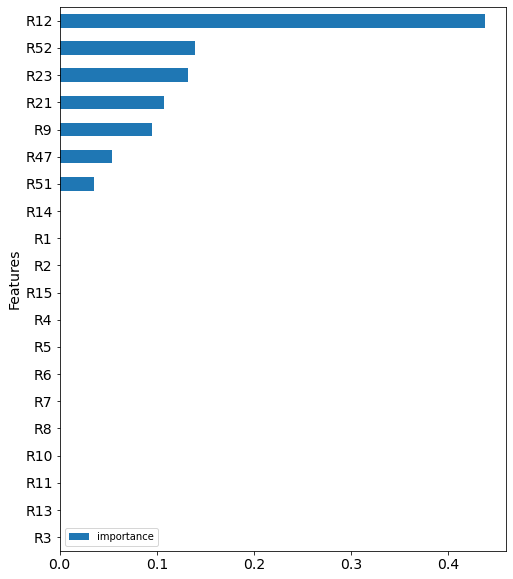

<Figure size 432x288 with 0 Axes>



Model Metrics..........       Training     Validation
Observations...........            166             42
Features...............             60             60
Maximum Tree Depth.....              3              3
Minimum Leaf Size......              4              4
Minimum split Size.....              2              2
Mean Absolute Error....         0.1355         0.3988
Avg Squared Error......         0.0678         0.3339
Accuracy...............         0.9096         0.5952
Precision..................     0.9189         0.6000
Recall (Sensitivity).......     0.8831         0.4500
Specificity................     0.9326         0.7273
F1-score...................     0.9007         0.5143
Total Misclassifications...         15             17
MISC (Misclassification)...       9.0%          40.5%
     class 0...............       6.7%          27.3%
     class 1...............      11.7%          55.0%


Training                  Class     Class
Confusion Matrix              0     

In [14]:
""" ************************************************************************ """
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from copy import deepcopy

print("\n*********************************************************************")
print("***** DECISION TREE OPTIMIZATION USING N-FOLD CROSS-VALIDATION ******")
print("*********************************************************************")

candidate_depths = [2, 3, 4, 5, 6, 7, 8, None]
candidate_splits = [2, 3, 4, 5, 6]
candidate_leafs  = [1, 2, 3, 4, 5]
best_metric      = 0.0  # The metric is F1, which ranges between 0 and 1
metric           = 'f1'
n_folds = 5  # Number of folds for cross-validation

# Hyperparameter optimization loop
for depth in candidate_depths:
    for split in candidate_splits:
        for leaf in candidate_leafs:
            dt = DecisionTreeClassifier(max_depth=depth,
                                        min_samples_split=split,
                                        min_samples_leaf=leaf,
                                        random_state=12345)
            score = cross_val_score(dt, X, y, cv=n_folds, scoring=metric)
            f1    = np.mean(score)
            std   = np.std(score)
            if f1 > best_metric:
                best_metric = f1
                best_tree   = deepcopy(dt)
                print("\nDecision Tree for Depth=", depth, "Min Split=", split,
                      "Min Leaf Size=", leaf)
                print("{:.<18s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
                print("{:.<18s}{:>7.4f}{:>10.4f}".format("F1V: ", f1, std))

# Fit the best decision tree on the training set
best_tree.fit(Xt, yt)
tree_levels = best_tree.get_depth()
tree_leafs  = best_tree.tree_.n_leaves
print("\nThe Best Tree has", tree_levels, "Levels and", tree_leafs, "Leaves")
print("\nBEST DECISION TREE SELECTED USING", n_folds, "-FOLD CV WITH F1V=", round(best_metric, 3))
tree_parms = best_tree.get_params()
print("Max Depth=", tree_parms['max_depth'])
print("Min Samples Split=", tree_parms['min_samples_split'])
print("Min Samples Leaf=", tree_parms['min_samples_leaf'])

# Display feature importance (Assuming `tree_classifier.display_importance` is defined)
tree_classifier.display_importance(best_tree, Xt.columns, top=20, plot=True)

# Display split metrics (Assuming `tree_classifier.display_split_metrics` is defined)
tree_classifier.display_split_metrics(best_tree, Xt, yt, Xv, yv)

# Cross-validation on the whole dataset with cv=5 and detailed metrics
print("\n***** CROSS-VALIDATION RESULTS ON THE WHOLE DATASET (CV=5) *****\n")

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Perform 5-fold cross-validation on the entire dataset
cv_results = cross_validate(best_tree, X, y, cv=5, scoring=scoring, return_train_score=False)

# Calculate and display mean cross-validation results
cv_metrics = {
    'Accuracy (%)': np.mean(cv_results['test_accuracy']) * 100,
    'Precision (%)': np.mean(cv_results['test_precision']) * 100,
    'Recall (%)': np.mean(cv_results['test_recall']) * 100,
    'F1 Score (%)': np.mean(cv_results['test_f1']) * 100
}

# Display cross-validation metrics
print(f"Mean Accuracy: {cv_metrics['Accuracy (%)']:.2f}%")
print(f"Mean Precision: {cv_metrics['Precision (%)']:.2f}%")
print(f"Mean Recall: {cv_metrics['Recall (%)']:.2f}%")
print(f"Mean F1 Score: {cv_metrics['F1 Score (%)']:.2f}%")



********************************************************************
**** RANDOM FOREST OPTIMIZATION USING N-FOLD CROSS-VALIDATION ******
********************************************************************

Random Forest for Depth= 3 Max Features= 4 Min Leaf Size= 1 Min Split Size 2
Metric............  Mean    Std. Dev.
F1V .............. 0.6489    0.1525

Random Forest for Depth= 3 Max Features= 4 Min Leaf Size= 1 Min Split Size 3
Metric............  Mean    Std. Dev.
F1V .............. 0.6607    0.1440

Random Forest for Depth= 3 Max Features= 4 Min Leaf Size= 1 Min Split Size 6
Metric............  Mean    Std. Dev.
F1V .............. 0.6713    0.1562

Random Forest for Depth= 3 Max Features= 9 Min Leaf Size= 1 Min Split Size 5
Metric............  Mean    Std. Dev.
F1V .............. 0.6776    0.1154

Random Forest for Depth= 3 Max Features= 9 Min Leaf Size= 1 Min Split Size 6
Metric............  Mean    Std. Dev.
F1V .............. 0.6846    0.1201

Random Forest for Depth= 3 Max 

<Figure size 432x288 with 0 Axes>

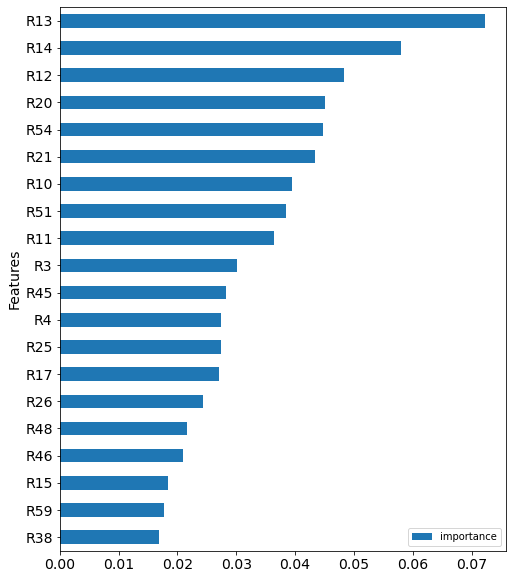

<Figure size 432x288 with 0 Axes>



Model Metrics..........       Training     Validation
Observations...........            166             42
Features...............             60             60
Maximum Tree Depth.....             10             10
Minimum Leaf Size......              1              1
Minimum split Size.....              5              5
Mean Absolute Error....         0.1621         0.3743
Avg Squared Error......         0.0430         0.1948
Accuracy...............         0.9940         0.7143
Precision..................     1.0000         0.7500
Recall (Sensitivity).......     0.9870         0.6000
Specificity................     1.0000         0.8182
F1-score...................     0.9935         0.6667
Total Misclassifications...          1             12
MISC (Misclassification)...       0.6%          28.6%
     class 0...............       0.0%          18.2%
     class 1...............       1.3%          40.0%


Training                  Class     Class
Confusion Matrix              0     

In [11]:
""" ************************************************************************ """
"""   RANDOM FOREST HYPERPARAMTER OPTIMIZATION USE CROSS-VALIDATION WITH F1  """
"""   PARAMETERS: MAX_DEPTH, MIN_SAMPLES_LEAF, MIN_SAMPLES_LEAF,             """
"""       MAX_FEATURES AND N_ESTIMATORS.                                     """
""" ************************************************************************ """
print("\n********************************************************************")
print("**** RANDOM FOREST OPTIMIZATION USING N-FOLD CROSS-VALIDATION ******")
print("********************************************************************")


bootstrap    = True #default draws max_samples for each tree
max_samples  = None #default draws all data for each tree (bootstrapping)
random_state = None #default see documentation
tree_depth        =  3 #best tree max_depth cv=5
tree_leaf_size    =  4 #best tree min_samples_leaf cv=5
tree_split_size   =  2 #best tree min_samples_split cv=5
criterion         = "gini" #default for interval targets
estimators_list   = [10] # of trees
depths            = [3, 4, 5, 6, 10, 11, 12, None] #Best=3
features          = [4, 5,'log2',7,'sqrt', 9, None] #sqrt=7.7 and log2=5.9
leaf_sizes        = [1, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16] #Best=4
split_sizes       = [2, 3, 4, 5, 6, 7] #Best=2
best_metric       = 0.0 #Used with f1  min value for f1
metric            = 'f1'
for e in estimators_list:
        for d in depths:
            for feature in features:
                for leaf_size in leaf_sizes:
                    for split_size in split_sizes:
                        rf = RandomForestClassifier(n_estimators=e, max_depth=d,
                                    max_features=feature, criterion=criterion,
                                    min_samples_split=split_size,
                                    min_samples_leaf=leaf_size, n_jobs=-63,
                                    bootstrap=True, random_state=12345)
                        score = cross_val_score(rf, X, y, cv=n_folds,
                                                scoring=metric)
                        f1    = np.mean(score)
                        std   = np.std(score)
                        if f1>best_metric:
                            best_metric = f1
                            best_forest = deepcopy(rf)
                            print("\nRandom Forest for Depth=", d,
                                  "Max Features=", feature,
                                  "Min Leaf Size=", leaf_size,
                                  "Min Split Size", split_size)
                            print("{:.<18s}{:>6s}{:>13s}".format(\
                                                 "Metric", "Mean", "Std. Dev."))
                            print("{:.<18s}{:>7.4f}{:>10.4f}".format(\
                                                 "F1V ", f1, std))

best_forest.fit(Xt, yt)
forest_parms = best_forest.get_params()
print("\nParameters for Best Forest:", forest_parms)
print("\nBEST RANDOM FOREST SELECTED USING ", n_folds, "-FOLD CV WITH F1V=",
      round(best_metric, 3))
forest_parms = best_forest.get_params()
print("Number of Estimators=", forest_parms['n_estimators'])
print("Max Depth=", forest_parms['max_depth'])
print("Max Features=", forest_parms['max_features'])
print("Min Samples Split=", forest_parms['min_samples_split'])
print("Min Samples Leaf=", forest_parms['min_samples_leaf'])
forest_classifier.display_importance(best_forest,Xt.columns, top=20, plot=True)
forest_classifier.display_split_metrics(best_forest, Xt, yt, Xv, yv)


In [13]:
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np
# Perform cross-validation using 5 folds
n_folds = 5

# Perform cross-validation
cv_results = cross_validate(
    best_forest,
    Xt,  # The feature matrix
    yt,  # The target vector
    cv=n_folds,  # Number of folds
    scoring=['accuracy', 'precision', 'recall', 'f1'],  # Scoring metrics
    return_train_score=True  # Return train scores as well
)

# Display results from cross-validation in percentage format
print(f"\nBest Random Forest selected using {n_folds}-fold cross-validation:")
print(f"Mean accuracy: {np.mean(cv_results['test_accuracy']) * 100:.2f}%")
print(f"Mean precision: {np.mean(cv_results['test_precision']) * 100:.2f}%")
print(f"Mean recall: {np.mean(cv_results['test_recall']) * 100:.2f}%")
print(f"Mean F1 score: {np.mean(cv_results['test_f1']) * 100:.2f}%")


Best Random Forest selected using 5-fold cross-validation:
Mean accuracy: 0.819
Mean precision: 0.873
Mean recall: 0.726
Mean F1 score: 0.783
